<a href="https://colab.research.google.com/github/Kaguya2906/Anomaly_Detection_Weekly_Project/blob/main/12.%20Sklearn%20RandomForest%2C%20SHAP%20Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Libraries, Dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Note: In this assignment, we are gonna implement Ski-learn RF, which compared to h2o rf, has stricter rules of missing values imputation and categorical-data handling. Anyways, I've done these pre-processing(including data clean and feature engineering)in hw8, so now I got my cleaned dataset here directly for further modeling.

In [ ]:
# Take 5% of the dataset because it's too big.
df = pd.read_csv("MortgageDefault_Cleaned.csv")
df = df.drop(columns=['Unnamed: 0'])
df = df.sample(frac=0.005, random_state=42)
df.sample(10)

,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,...,0,1,2,3,4,5,6,7,8,9
21879,21880.0,0.0,47.0,2.0,1.0,12.0,3.0,3.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30137,30138.0,1.0,27.0,2.0,1.0,12.0,5.0,5.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
70841,70842.0,0.0,48.0,2.0,1.0,12.0,5.0,5.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
69867,69868.0,1.0,33.0,1.0,1.0,12.0,4.0,4.0,1.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
56666,56667.0,0.0,30.0,1.0,1.0,12.0,4.0,4.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38899,38900.0,1.0,33.0,1.0,4.0,12.0,2.0,5.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
73674,73675.0,0.0,28.0,1.0,3.0,12.0,1.0,1.0,1.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,2475.0,0.0,34.0,1.0,1.0,12.0,5.0,5.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38175,38176.0,0.0,33.0,1.0,4.0,12.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
66221,66222.0,0.0,37.0,1.0,3.0,6.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# SkLearn Random Forest

In [ ]:
# target, predictors
X = df.drop('loan_default', axis=1)
y = df['loan_default']

# train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        67
         1.0       0.00      0.00      0.00        13

    accuracy                           0.84        80
   macro avg       0.42      0.50      0.46        80
weighted avg       0.70      0.84      0.76        80

Confusion Matrix:
[[67  0]
 [13  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Not bad. The auc score is higher than h2o performance.

# SHAP Value

The SHAP values provide two great advantages:

1. Global interpretability — the SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it can show the positive or negative relationship for each variable with the target (see the summary plots below).

2. Local interpretability — each observation gets its own set of SHAP values (see the individual force plots below). This greatly increases its transparency. We can explain why a case receives its prediction and the contributions of the predictors. Traditional variable importance algorithms only show the results across the entire population but not in each case. The local interpretability enables us to pinpoint and contrast the impacts of the factors.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 10.6 MB/s eta 0:00:00


## Global bar plot
Passing a matrix of SHAP values to the bar plot function creates a global feature importance plot, where the global importance of each feature is taken to be the mean absolute value for that feature over all the given samples.

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


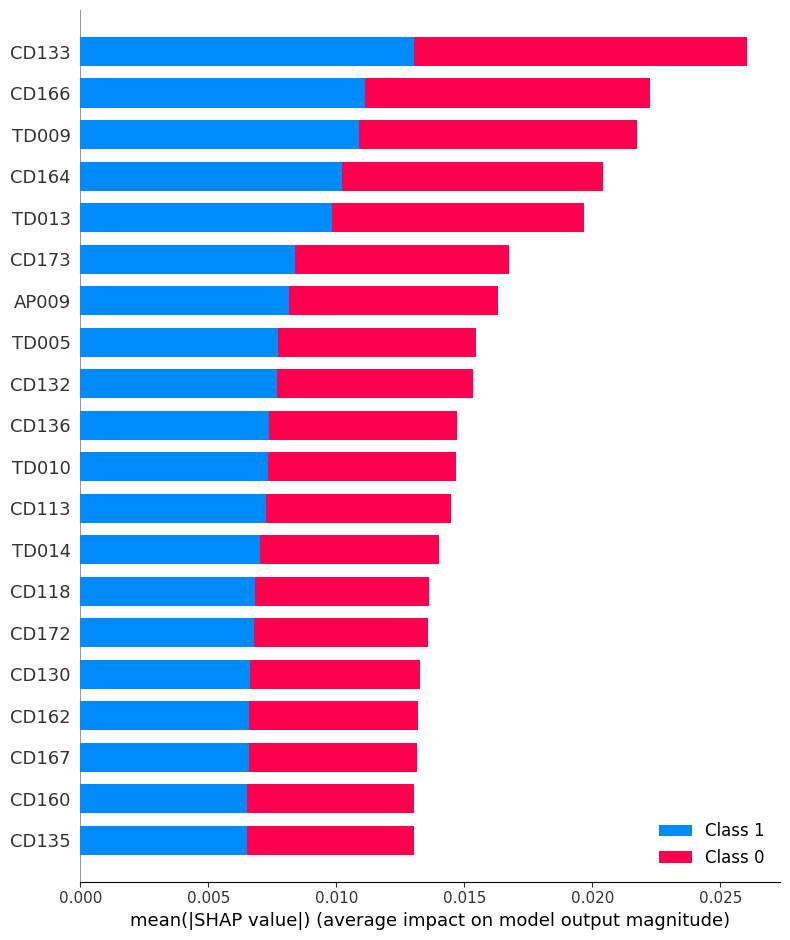

In [ ]:
import shap
shap_values = shap.TreeExplainer(rf_classifier).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Top 10 variables that describe the model:** A high possibility of loan_default is associated with the following characteristics:

CD133:CNT_TOP3_FREQUENT_INBOUND_PHONE_NUMBERS_INBOUND_CALLS_LAST_2MON

CD166: LEN_SERVICE_CALLS_LAST_1MON

TD009: TD_CNT_QUERY_LAST_3MON_P2P

CD164: CNT_SERVICE_OUTBOUND_CALLS_LAST_3MON

TD013: TD_CNT_QUERY_LAST_6MON_P2P

CD173: LEN_SERVICE_OUTBOUND_CALLS_LAST_3MON

TD009: TD_CNT_QUERY_LAST_3MON_P2P

TD005: TD_CNT_QUERY_LAST_1MON_P2P

CD132:CNT_TOP3_FREQUENT_OUTBOUND_PHONE_NUMBERS_OUTBOUND_CALLS_LAST_2MON

CD136:CNT_TOP3_FREQUENT_INBOUND_PHONE_NUMBERS_OUTBOUND_CALLS_LAST_3MON

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted house price as RM (the average number of rooms per house in an area) changes. Vertical dispersion at a single value of RM represents interaction effects with other features. To help reveal these interactions dependence_plot automatically selects another feature for coloring. In this case coloring by RAD (index of accessibility to radial highways) highlights that the average number of rooms per house has less impact on home price for areas with a high RAD value.

In [ ]:
shap_values[0]

array([[-0.00880297, -0.00292568, -0.00193409, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00083286,  0.00412888, -0.00115178, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00069287,  0.00137786,  0.00113664, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00058213,  0.00061846,  0.0010089 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00729388, -0.00101651, -0.00101206, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00252198,  0.00010603,  0.00339536, ...,  0.        ,
         0.        ,  0.        ]])

## Dependence Plot

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model.
Each dot is a single prediction (row) from the dataset.

The x-axis is the value of the feature (from the X matrix).

The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.

The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

- The first argument is the index of the feature we want to plot (x-axis)
- The second argument is the matrix of SHAP values (it is the same shape as the data matrix) (y-axis)
- The third argument is the data matrix (a pandas dataframe or numpy array)

Below I'll randomly choose 5 features out of the top 10, and visualize their relationships with another feature.

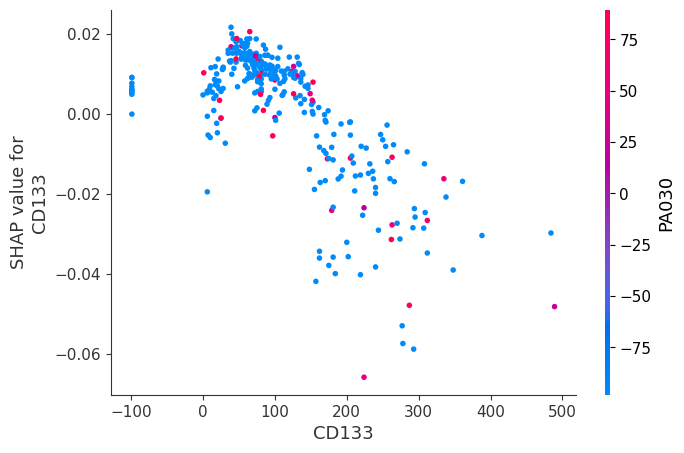

In [ ]:
shap.dependence_plot('CD133', shap_values[0], X_train)
plt.show()

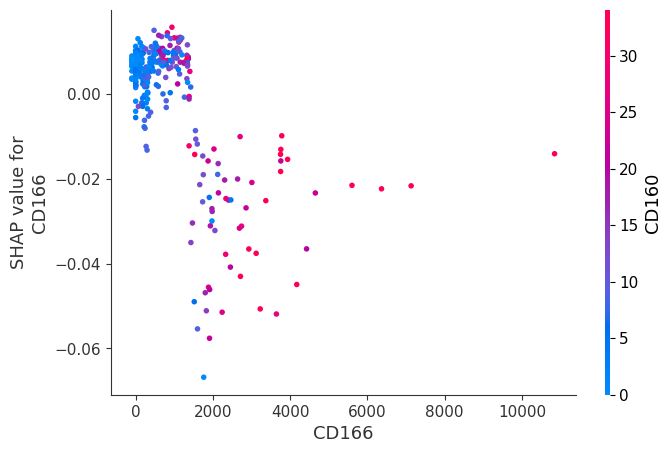

In [ ]:
shap.dependence_plot('CD166', shap_values[0], X_train)
plt.show()

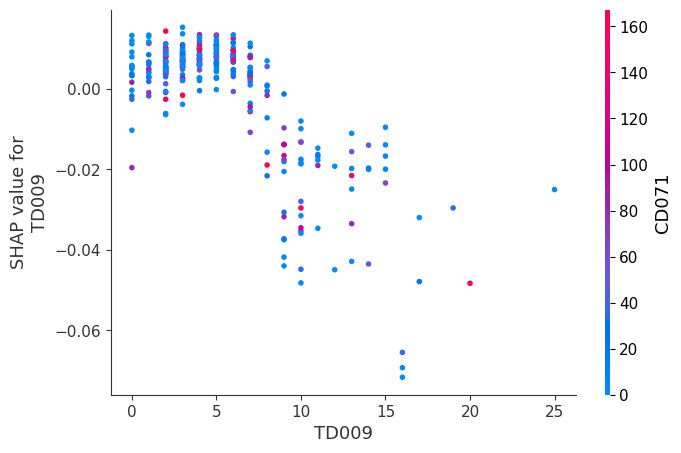

In [ ]:
shap.dependence_plot('TD009', shap_values[0], X_train)
plt.show()

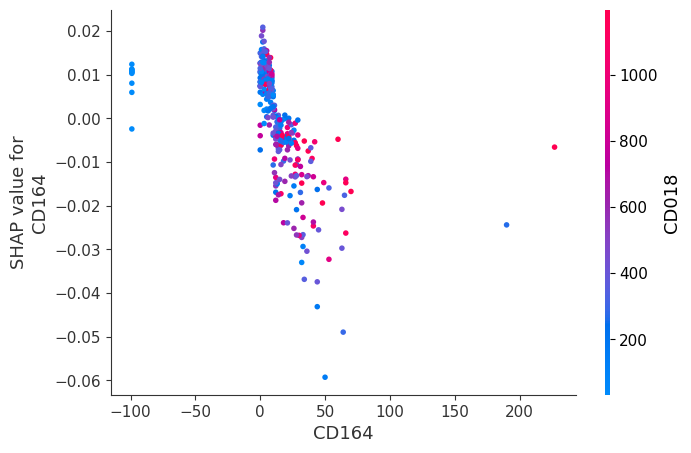

In [ ]:
shap.dependence_plot('CD164', shap_values[0], X_train)
plt.show()

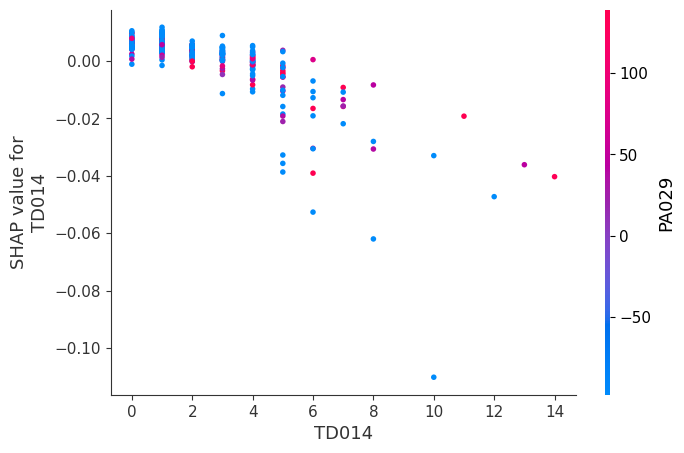

In [ ]:
shap.dependence_plot('TD014', shap_values[0], X_train)
plt.show()

## Force_plot for 4 individual observations


In [ ]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(rf_classifier.predict(X_output),2)

random_picks = np.arange(1,80,1)
S = X_output.iloc[random_picks]
S

,id,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,...,1,2,3,4,5,6,7,8,9,predict
6757,6758.0,33.0,1.0,4.0,12.0,3.0,3.0,1.0,5.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32278,32279.0,39.0,2.0,1.0,12.0,5.0,5.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34382,34383.0,34.0,1.0,3.0,12.0,4.0,4.0,1.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27155,27156.0,27.0,1.0,1.0,12.0,4.0,1.0,0.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59348,59349.0,26.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45669,45670.0,26.0,2.0,1.0,12.0,5.0,4.0,0.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25605,25606.0,25.0,1.0,1.0,12.0,2.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63236,63237.0,45.0,1.0,1.0,12.0,1.0,1.0,1.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68852,68853.0,47.0,1.0,1.0,12.0,5.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(rf_classifier)
    shap_values_Model = explainerModel.shap_values(S)
    # Extract the SHAP values for the positive class
    shap_values_pos_class = shap_values_Model[1]
    p = shap.force_plot(explainerModel.expected_value[1], shap_values_pos_class[j], S.iloc[j])
    return(p)

In [ ]:
X_train.mean()

id       40814.884375
AP001       31.693750
AP002        1.328125
AP003        2.081250
AP004       11.353125
             ...     
5            0.000000
6            0.000000
7            0.000000
8            0.000000
9            0.000000
Length: 99, dtype: float64

In [ ]:
y_test.mean()

0.1625

In [ ]:
shap.initjs()
shap_plot(0)

In [ ]:
shap.initjs()
shap_plot(1)

In [ ]:
shap.initjs()
shap_plot(2)

In [ ]:
shap.initjs()
shap_plot(3)

The above four force plots show the 4 selected observations in the dataset. The base value is 0.1901 which shows a rate of 19% that a record may show that there is a loan default. Each of the plot has different f(x) value, ranging from 0.16 to 0.26, which shows the individual records associated with a possibility that the default will happen. The variable combinations and their values stand for the value that associated with the default happening. The band width of the variable denotes the strength of the variable that makes it happened.

## Interpretation for top 5 variables

### CD133
`CNT_TOP3_FREQUENT_INBOUND_PHONE_NUMBERS_INBOUND_CALLS_LAST_2MON`

CD133 shows the communication activity which can indicate how frequently customers are interacting with the mortgage provider or other related parties through phone calls. A higher count may suggest more engagement with the mortgage process, while a lower count may indicate less active involvement. The most frequent inbound phone numbers might belong to particular contacts or departments, such as customer service, loan officers, or other relevant parties. This information could provide insights into customer preferences and their preferred contact points. Analyzing this feature across different customer segments might reveal patterns and differences in communication behaviors among various customer groups.

### CD166
`LEN_SERVICE_CALLS_LAST_1MON`

CD166 shows duration that the length of service calls indicates how much time customers spent communicating with the mortgage provider's service department. Longer call durations might suggest more complex issues or discussions. Shorter call durations may indicate efficient and satisfactory issue resolution, while longer call durations could signal unresolved or challenging customer concerns. Analyzing the average or median call duration over time can help the mortgage provider assess the efficiency of their customer service operations and identify areas for improvement. By studying call durations for different customer segments, the mortgage provider can gain insights into the varying experiences of different customer groups. Analyzing call duration trends over time may reveal patterns in customer inquiries and issues, which can help the provider proactively address common concerns.


### TD009
`TD_CNT_QUERY_LAST_3MON_P2P`

P2P Transaction Activity: The count of queries related to P2P transactions indicates how frequently the customer has inquired or interacted with P2P services. P2P transactions typically involve the transfer of funds between individuals without the involvement of traditional financial institutions. Customer Financial Behavior: A higher count of P2P queries might suggest that the customer is actively using P2P services as part of their financial activities. This could indicate preferences for certain payment methods or money transfer services. Alternative Financial Services: P2P transactions are considered an alternative financial service outside the traditional banking system. Monitoring P2P transaction queries can help financial institutions understand customers' interest in and reliance on alternative financial services. In the context of a mortgage application, the number of P2P queries might be considered as part of the risk assessment process. High P2P transaction activity may impact the customer's financial stability or creditworthiness.Analyzing this feature across different customer segments can provide insights into the usage patterns of P2P services among various customer groups.



### CD164
`CNT_SERVICE_OUTBOUND_CALLS_LAST_3MON`

Customer Service Engagement: The count of outbound service calls reflects how actively the mortgage provider's service department communicates with customers. A higher count may indicate more proactive customer support or attempts to address customer needs. Outbound service calls can be an essential component of issue resolution. The frequency of such calls may provide insights into the mortgage provider's responsiveness and effectiveness in addressing customer concerns. Frequent outbound calls could be a sign of the mortgage provider's commitment to customer satisfaction. Monitoring this feature over time may help assess changes in customer satisfaction levels. Outbound calls are often used for customer feedback, follow-up, or updates. Analyzing the patterns of outbound calls can help identify instances where customer input and follow-up are essential. The volume of outbound service calls can also be used to assess the efficiency of the mortgage provider's customer service operations. Efficient operations may result in fewer repeated calls and more effective issue resolution. Analyzing outbound service calls across different customer segments can reveal patterns in customer service needs and preferences.


### TD013
`TD_CNT_QUERY_LAST_6MON_P2P`

The count of queries related to P2P transactions indicates how frequently the customer has inquired or interacted with P2P services over the last 6 months. P2P transactions involve the direct transfer of funds between individuals without the involvement of traditional financial institutions. A higher count of P2P queries might suggest that the customer is actively using P2P services as part of their financial activities. This could indicate preferences for certain payment methods or money transfer services. The 6-month timeframe captures the customer's engagement with P2P transactions over a more extended period, providing a broader picture of their involvement in alternative financial services. P2P transactions are considered an alternative financial service outside the traditional banking system. Monitoring P2P transaction queries can help financial institutions understand customers' interest in and reliance on alternative financial services. In the context of a mortgage application, the number of P2P queries might be considered as part of the risk assessment process. High P2P transaction activity may impact the customer's financial stability or creditworthiness. Analyzing this feature across different customer segments can provide insights into the usage patterns of P2P services among various customer groups.

